# Predicting House Prices

### Project Overview

This project builds a predictive model using Linear Regression to estimate house prices based on features in the dataset. The goal is to explore, preprocess, train, evaluate, and visualize results.

## Import Libraries

In [2]:
# import  libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for ignoring any kind of warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset & Explore

In [3]:
# loading dataset
df = pd.read_csv(r'Housing.csv')

In [4]:
# check columns 
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
# check dataset shape
df.shape
print("No. of Rows:", df.shape[0])
print("No. of Columns:", df.shape[1])

No. of Rows: 545
No. of Columns: 13


In [6]:
# check first 5 rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# check last 5 rows of the dataset
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
# show statistical summary of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [9]:
# check info's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
# Null Values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
# check how many unique values each column contains
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

## Descriptive Analysis

In [12]:
print('bedrooms - Mean', df['bedrooms'].mean())
print('bedrooms - Median', df['bedrooms'].median())
print('bedrooms - Mode', df['bedrooms'].mode().values)
print('bedrooms - Std Dev', df['bedrooms'].std())

bedrooms - Mean 2.9651376146788992
bedrooms - Median 3.0
bedrooms - Mode [3]
bedrooms - Std Dev 0.738063860568575


In [13]:
print('bathrooms - Mean', df['bathrooms'].mean())
print('bathrooms - Median', df['bathrooms'].median())
print('bathrooms - Mode', df['bathrooms'].mode().values)
print('bathrooms - Std Dev', df['bathrooms'].std())

bathrooms - Mean 1.2862385321100918
bathrooms - Median 1.0
bathrooms - Mode [1]
bathrooms - Std Dev 0.502469616053218


In [14]:
print('stories - Mean', df['stories'].mean())
print('stories - Median', df['stories'].median())
print('stories - Mode', df['stories'].mode().values)
print('stories - Std Dev', df['stories'].std())

stories - Mean 1.8055045871559634
stories - Median 2.0
stories - Mode [2]
stories - Std Dev 0.8674924629255298


In [15]:
print('parking - Mean', df['parking'].mean())
print('parking - Median', df['parking'].median())
print('parking - Mode', df['parking'].mode().values)
print('parking - Std Dev', df['parking'].std())

parking - Mean 0.6935779816513762
parking - Median 0.0
parking - Mode [0]
parking - Std Dev 0.8615857504605449


In [16]:
print('area - Mean', df['area'].mean())
print('area - Median', df['area'].median())
print('area - Mode', df['area'].mode().values)
print('area - Std Dev', df['area'].std())

area - Mean 5150.54128440367
area - Median 4600.0
area - Mode [6000]
area - Std Dev 2170.141022508803


In [17]:
print('price - Mean', df['price'].mean())
print('price - Median', df['price'].median())
print('price - Mode', df['price'].mode().values)
print('price - Std Dev', df['price'].std())

price - Mean 4766729.247706422
price - Median 4340000.0
price - Mode [3500000 4200000]
price - Std Dev 1870439.615657394


## Data Cleaning & Preprocessing

In [18]:
# check duplicate values
print("Duplicate Values in the Dataset:", df.duplicated().sum())

Duplicate Values in the Dataset: 0


In [19]:
# check null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [20]:
# Standardization Columns (if any)
df.columns = df.columns.str.strip().str.replace(' ','')

In [21]:
# check updated dataframe
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [22]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Exploratory Data Analysis

### Distribution of House Price

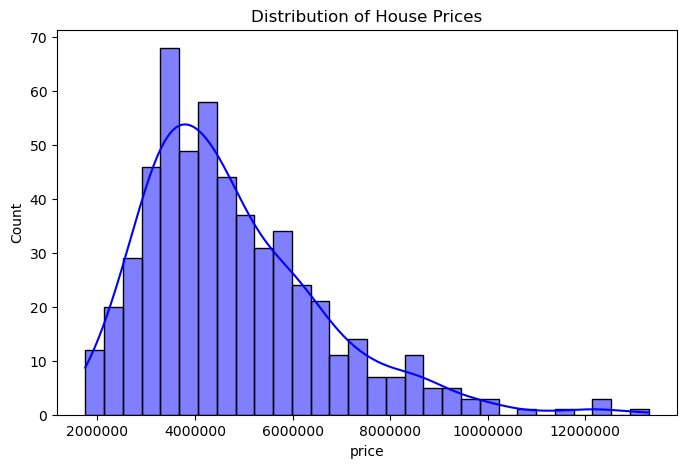

In [23]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color="blue", edgecolor="black")
plt.title("Distribution of House Prices")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Distribution of Area

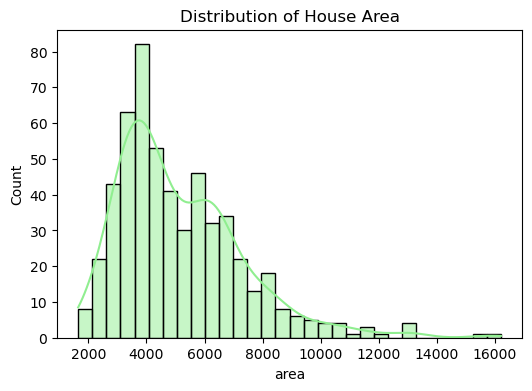

In [24]:
# Area distribution
plt.figure(figsize=(6,4))
sns.histplot(df['area'], bins=30, kde=True, color="lightgreen")
plt.title("Distribution of House Area")
plt.show()

### Average House Price by Furnishing Status

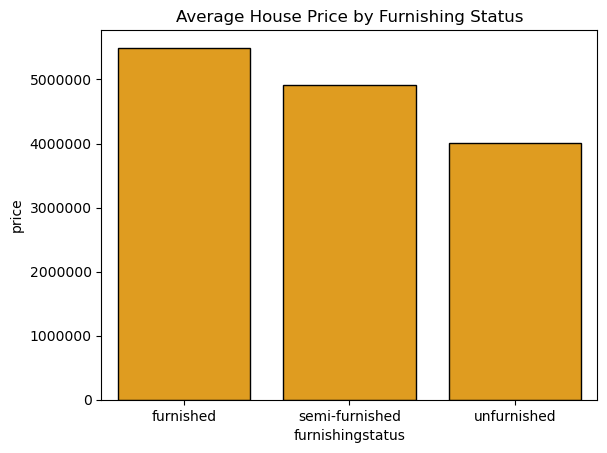

In [27]:
# Average Price vs Furnishing Status
sns.barplot(x="furnishingstatus", y="price", data=df, estimator=np.mean, errorbar=None, color="orange", edgecolor='black')
plt.title("Average House Price by Furnishing Status")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Price vs Area

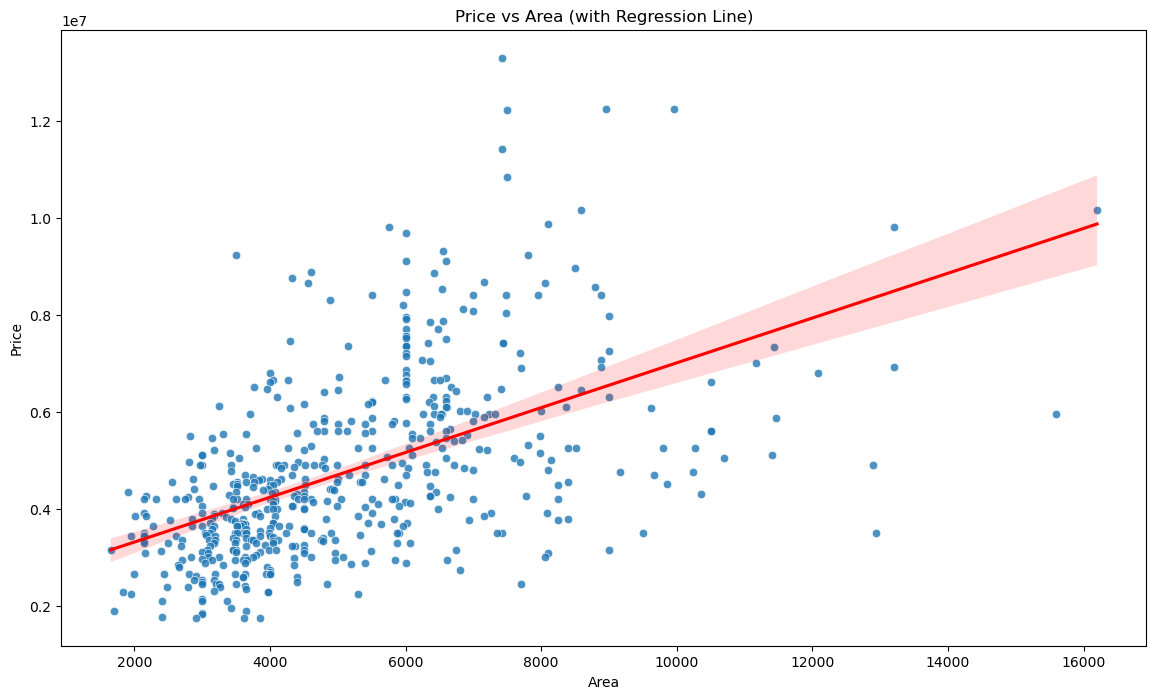

In [29]:
plt.figure(figsize=(14,8))

# scatter plot
sns.scatterplot(x=df['area'], y=df['price'], alpha=0.8)

# regression line (red)
sns.regplot(x=df['area'], y=df['price'], scatter=False, color="red")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area (with Regression Line)")
plt.show()

### Frequency Distribution of Categorical Variables

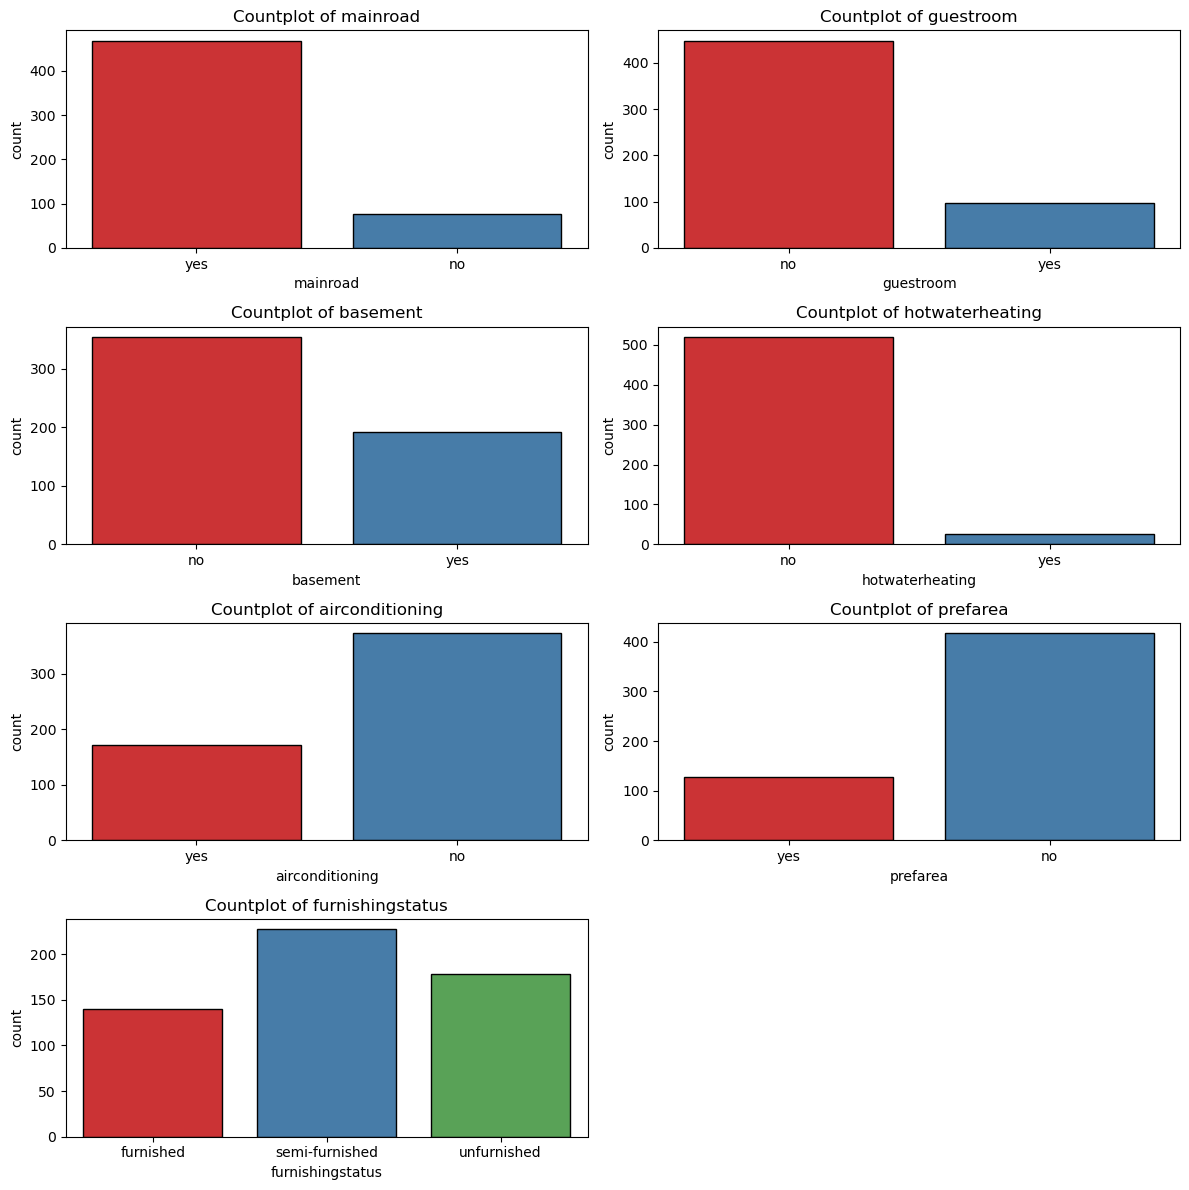

In [30]:
# store all the categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

plt.figure(figsize=(12, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols)//2 + 1, 2, i)
    sns.countplot(x=col, data=df, palette="Set1", edgecolor='black')
    plt.title(f"Countplot of {col}")
plt.tight_layout()
plt.show()

In [31]:
# Frequency tables for categorical columns
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

Value counts for guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

Value counts for basement:
basement
no     354
yes    191
Name: count, dtype: int64

Value counts for hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Value counts for airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

Value counts for prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

Value counts for furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


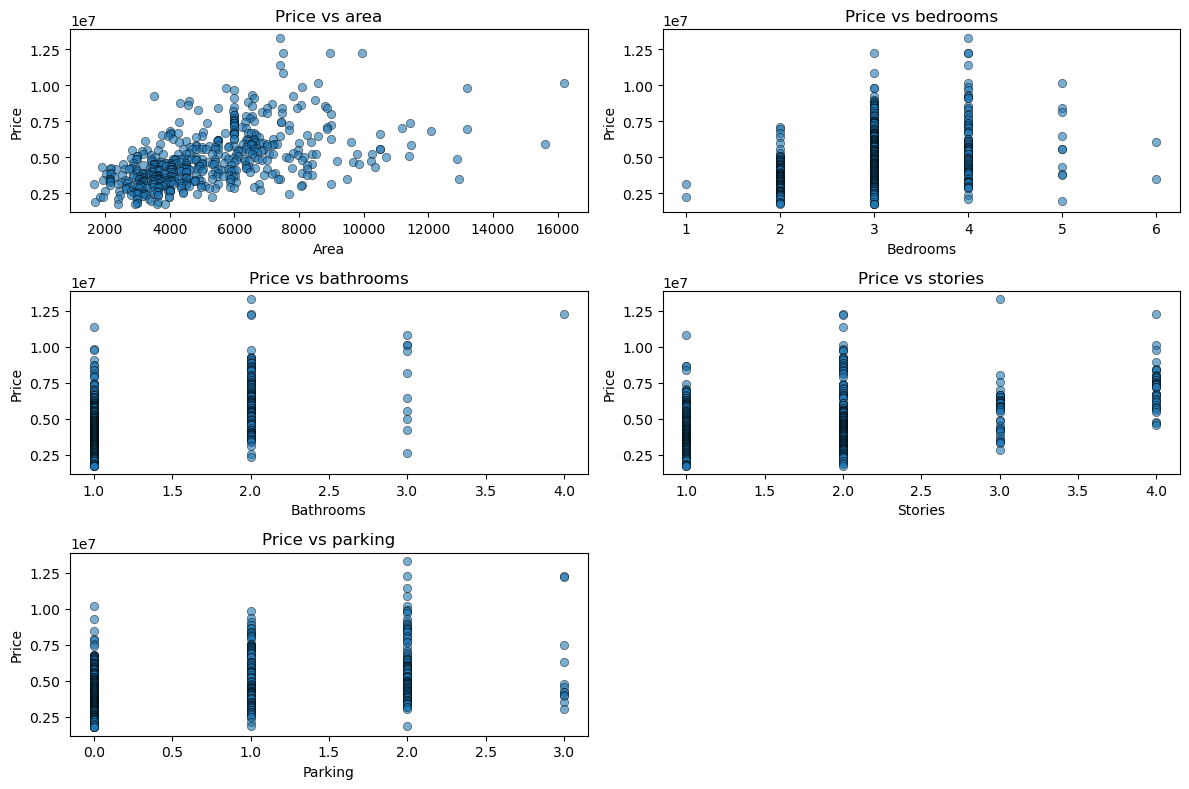

In [32]:
# numerical columns (except price)
num_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]

# scatterplots
plt.figure(figsize=(12,8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3,2,i)   # 3 row, 2 col grid
    sns.scatterplot(x=col, y="price", data=df, alpha=0.6, edgecolor="k")
    plt.title(f"Price vs {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

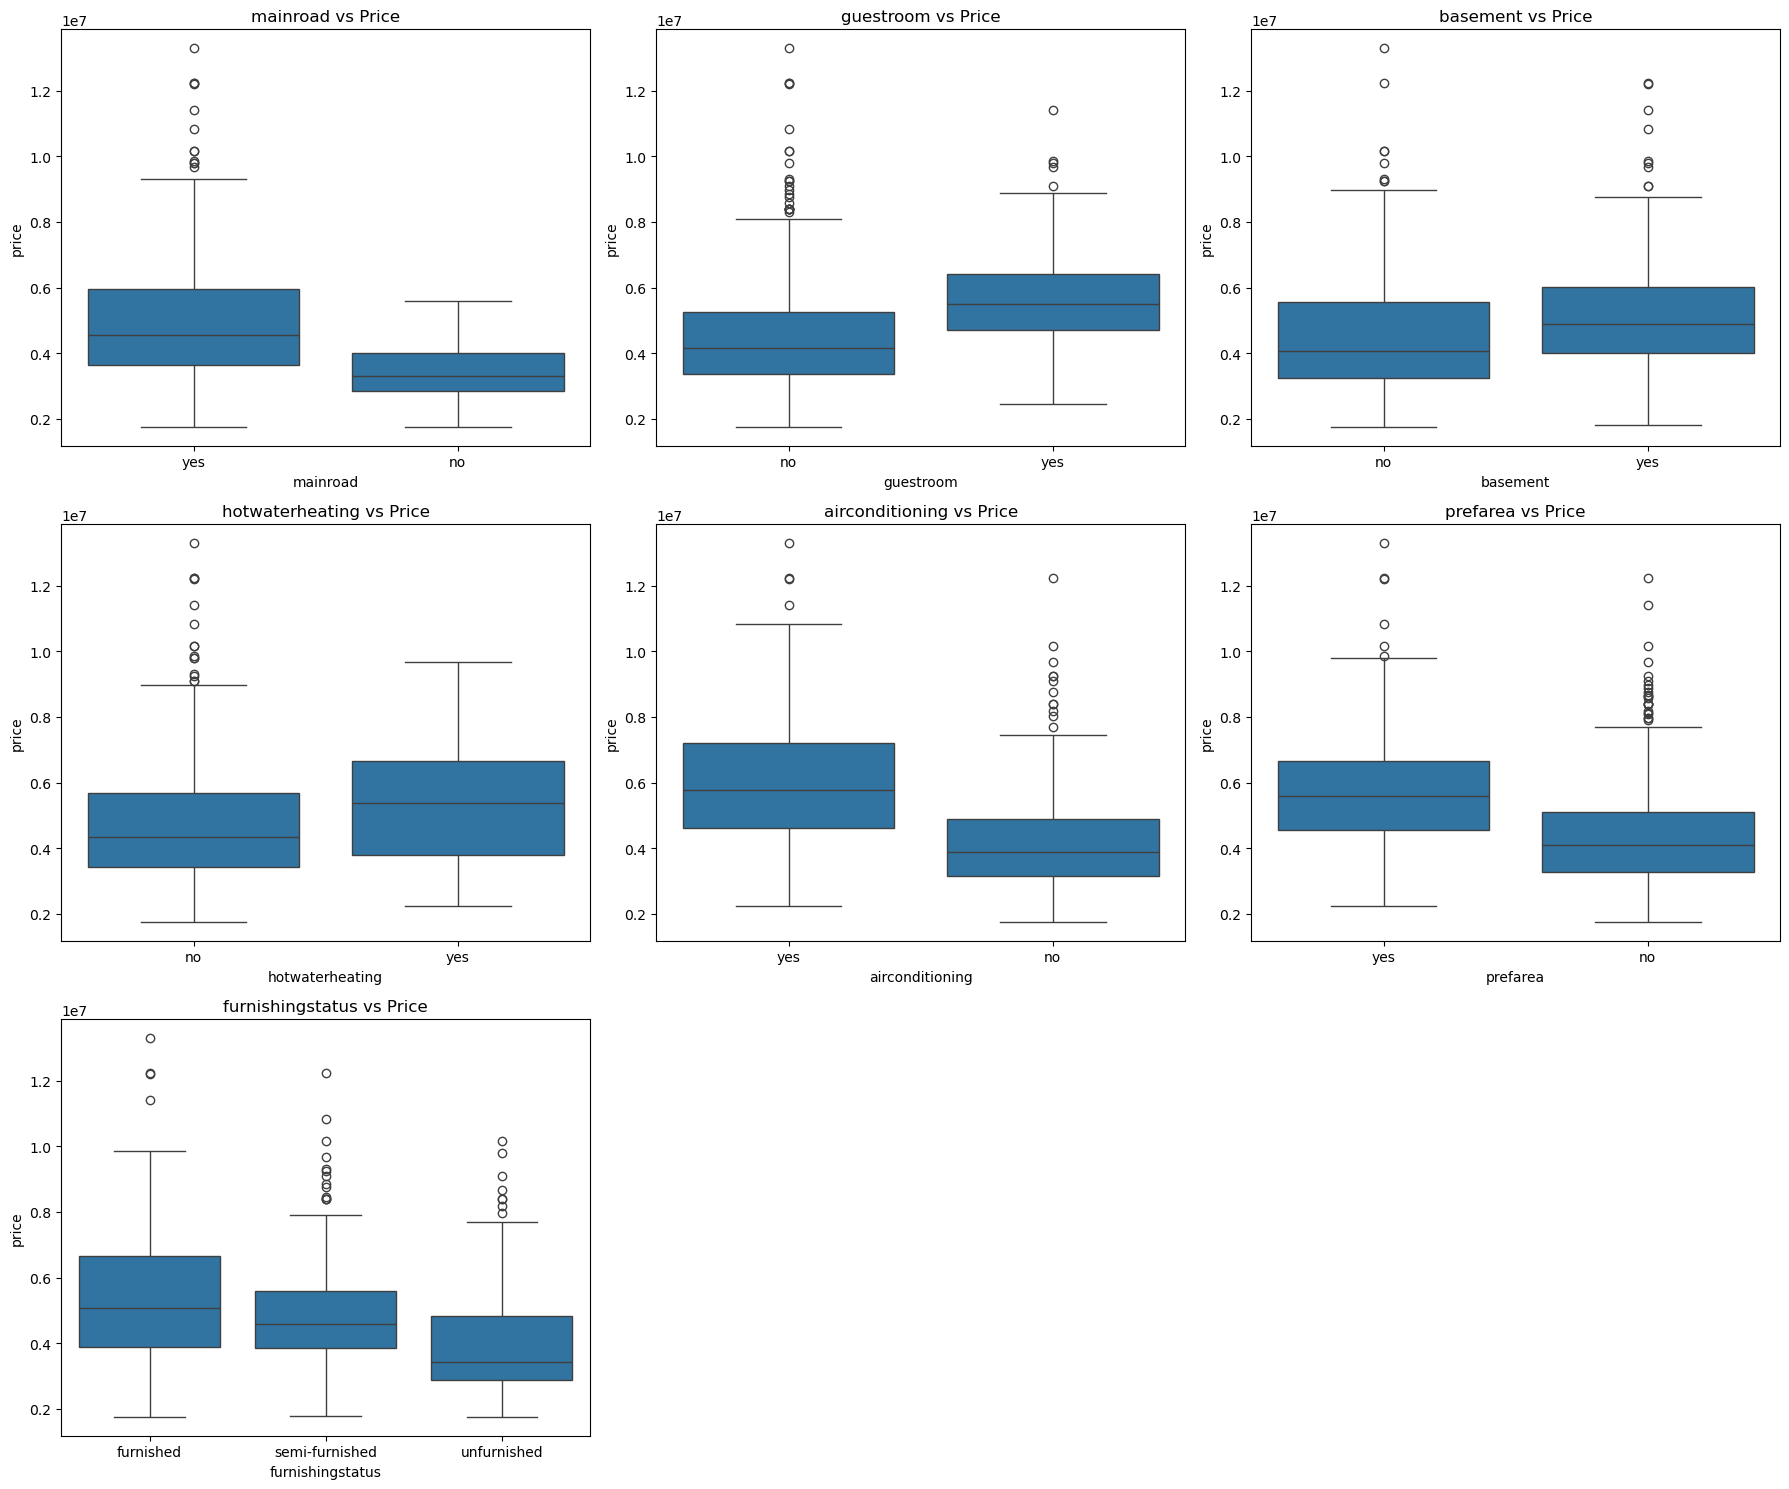

In [33]:
import math
# total categorical columns
n = len(categorical_cols)

# rows calculate based on 3 plots per row
rows = math.ceil(n/3)

plt.figure(figsize=(18, 5*rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f"{col} vs Price")
plt.tight_layout()
plt.show()

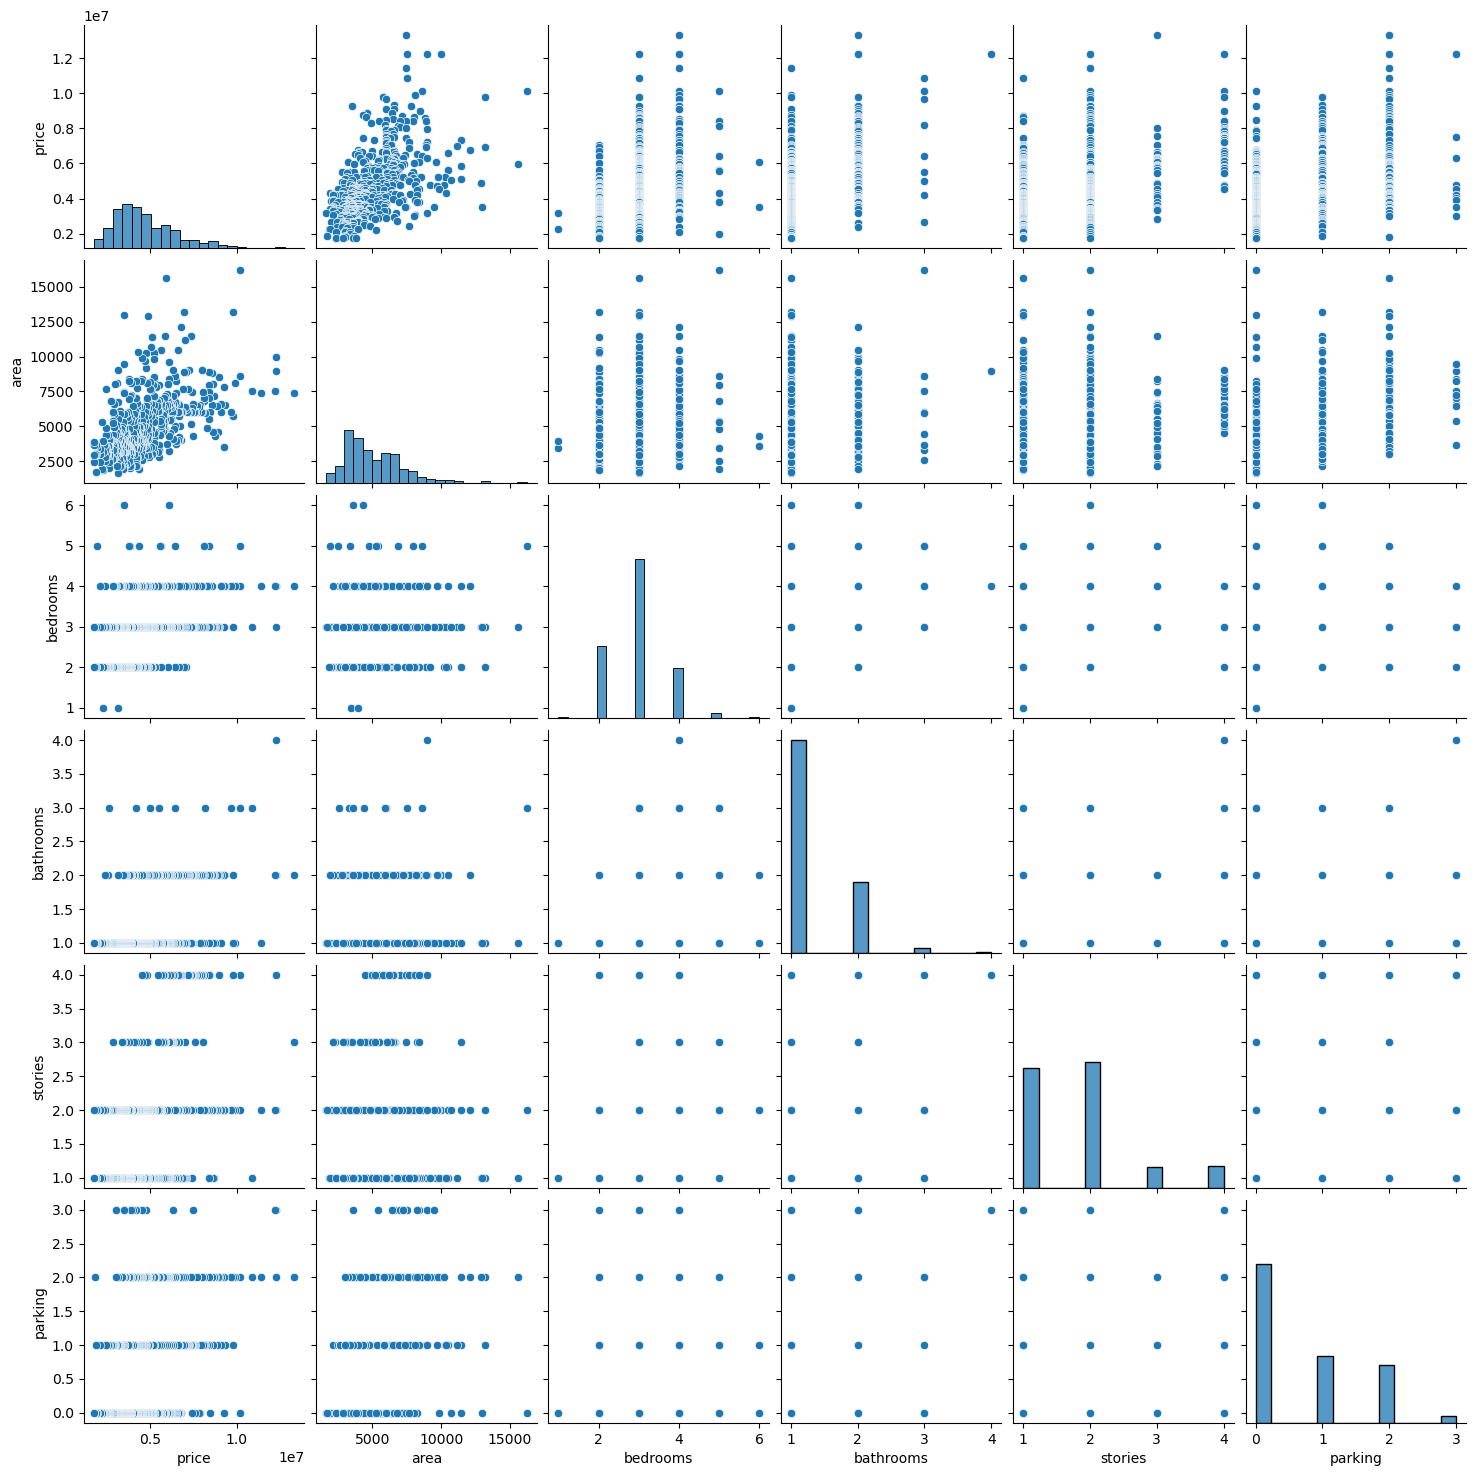

In [35]:
# Pairplot of Numerical Columns
sns.pairplot(df[["price","area","bedrooms","bathrooms","stories","parking"]])
plt.show()

### Correlation of Price with other numerical columns

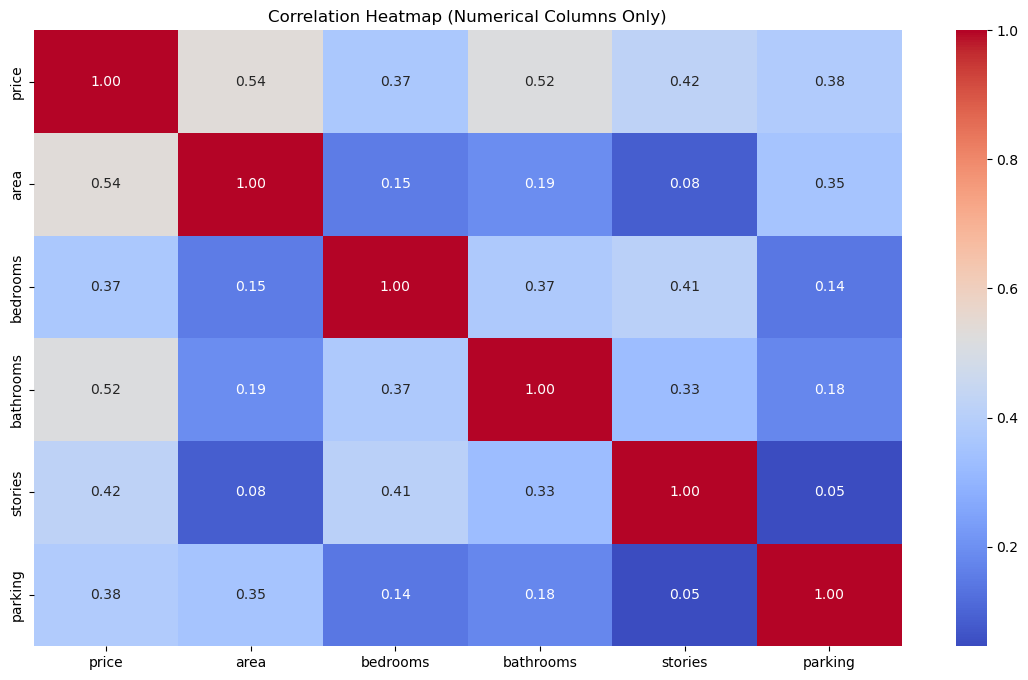

In [38]:
# select only num columns
num_cols = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(14,8))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns Only)")
plt.show()

In [39]:
# correlation values
print("Correlation of Price with other numerical columns:\n")
for col in num_cols:
    corr = df["price"].corr(df[col])
    print(f"Price vs {col}: {corr:.2f}")

Correlation of Price with other numerical columns:

Price vs price: 1.00
Price vs area: 0.54
Price vs bedrooms: 0.37
Price vs bathrooms: 0.52
Price vs stories: 0.42
Price vs parking: 0.38


### Outliers Detection

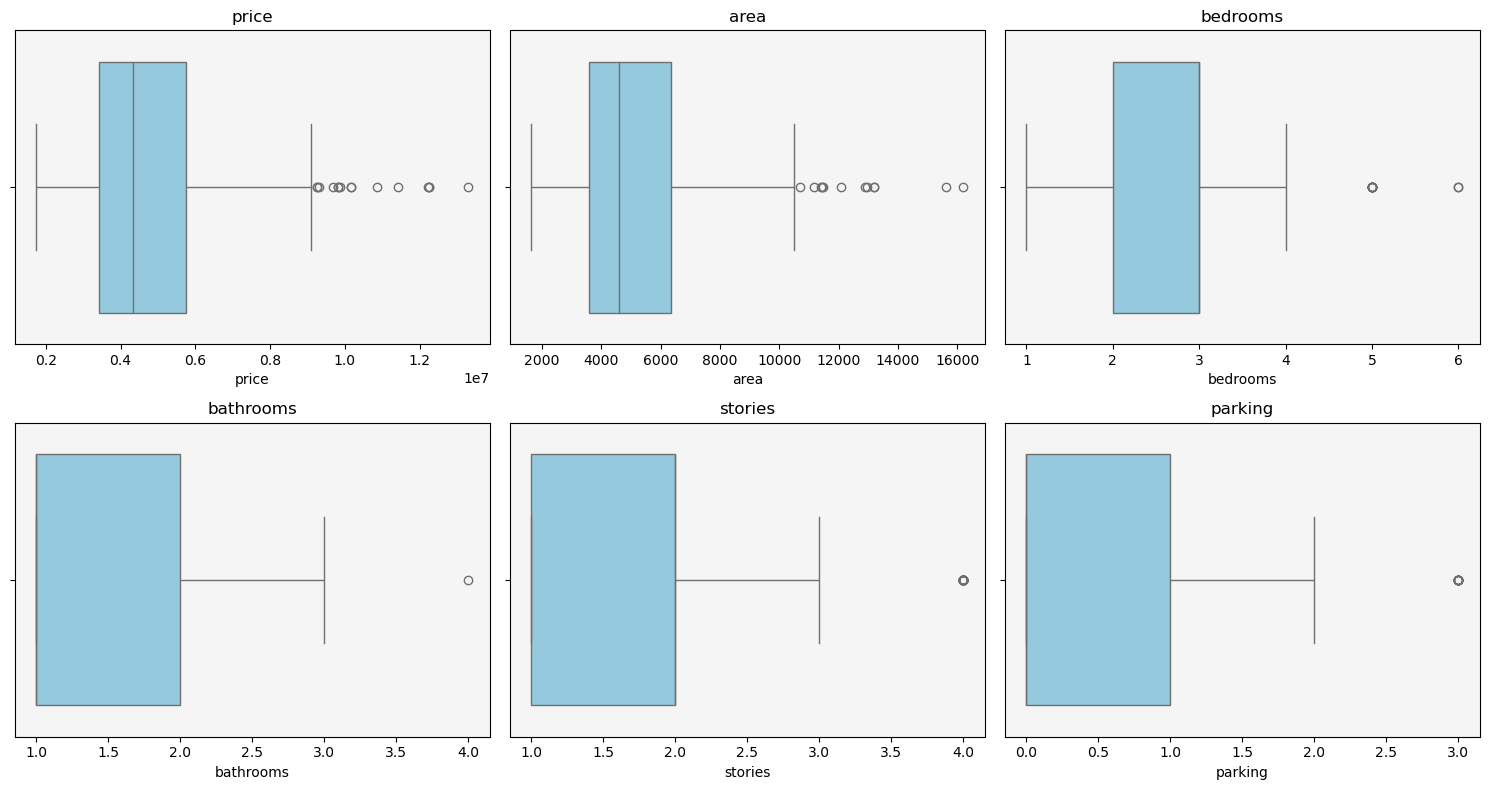

In [40]:
# select only those columns which contains numerical values 
num_cols = df.select_dtypes(include = 'number').columns

# Plot settings
cols = 3  # number of plots per row
rows = (len(num_cols) + cols - 1) // cols
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(col)
    plt.gca().set_facecolor('whitesmoke')  # for light background
plt.tight_layout()
plt.show()

### Outliers Handling

In [41]:
# Outlier Capping
for col in ["price", "area"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

### Feature Engineering

In [43]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [44]:
# One-Hot Encoding for Multi-category columns 
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df = df.astype(int)

In [45]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,9205000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9205000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,9205000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,9205000,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,9205000,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,9205000,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,9205000,10500,5,3,2,1,0,0,0,0,0,0,0,1
8,9205000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9205000,5750,3,2,4,1,1,0,0,1,1,1,0,1


In [52]:
y = np.log1p(df['price'])

### Feature & Target Split

In [53]:
X = df.drop('price', axis=1)
y = df['price']

In [54]:
print('price' in X.columns)

False


### Variance Inflation

In [55]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# agar X_scaled use kiya hai toh wahi daalo, warna X
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            feature        VIF
0                              area   9.483238
1                          bedrooms  16.717000
2                         bathrooms   9.435064
3                           stories   7.866723
4                          mainroad   6.998198
5                         guestroom   1.478184
6                          basement   2.019211
7                   hotwaterheating   1.091755
8                   airconditioning   1.772092
9                           parking   2.002835
10                         prefarea   1.498957
11  furnishingstatus_semi-furnished   2.392861
12     furnishingstatus_unfurnished   2.012769


### Train_Test_Split

In [60]:
# import required libraries
from sklearn.model_selection import train_test_split

# train_test_split (train-80% & test-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [61]:
# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [ ]:
import required libraries
from sklearn.linear_model import LinearRegression

# initialize model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()
##### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
##### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

LinearRegression
?Documentation for LinearRegressioniFitted
LinearRegression()


In [67]:
# prediction
y_pred = lr.predict(X_test)

In [68]:
# import required libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Performance Metrics:
Mean Squared Error (MSE): 1292078952546.46
Root Mean Squared Error (RMSE): 1136696.51
Mean Absolute Error (MAE): 881928.61
R-squared (R²): 0.68


### Thank You...